In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("airquality1.csv")

In [3]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,high
2,3,12.0,149.0,12.6,74,5,3,high
3,4,18.0,313.0,11.5,62,5,4,high
4,5,NaN,NaN,14.3,56,5,5,high


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,high
2,12.0,149.0,12.6,74,5,3,high
3,18.0,313.0,11.5,62,5,4,high
4,NaN,NaN,14.3,56,5,5,high


In [6]:
df.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
humidity     4
dtype: int64

In [7]:
meanOzone=df[['Ozone']].mean()

In [8]:
meanOzone

Ozone    42.12931
dtype: float64

In [9]:
meanSolar=df[['Solar.R']].mean()
meanSolar

Solar.R    185.931507
dtype: float64

In [10]:
meanhum=df[['humidity']].mode()
meanhum

,humidity
0,high


In [11]:
df[['Ozone']]=df[['Ozone']].fillna(value=meanOzone)
df[['Solar.R']]=df[['Solar.R']].fillna(value=meanSolar)
df[['humidity']]=df[['humidity']].fillna(value=meanhum)

In [12]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
humidity    4
dtype: int64

In [13]:
#data integration

In [14]:
subset1=df.loc[0:5,['Ozone']]

In [15]:
subset1

,Ozone
0,41.00000
1,36.00000
2,12.00000
3,18.00000
4,42.12931
5,28.00000


In [16]:
subset2=df.loc[0:10,['Ozone','humidity']]

In [17]:
subset2

,Ozone,humidity
0,41.00000,high
1,36.00000,high
2,12.00000,high
3,18.00000,high
4,42.12931,high
5,28.00000,high
6,23.00000,low
7,19.00000,low
8,8.00000,low
9,42.12931,low


In [18]:
merge=subset2.merge(subset1)
merge

,Ozone,humidity
0,41.00000,high
1,36.00000,high
2,12.00000,high
3,18.00000,high
4,42.12931,high
5,42.12931,low
6,28.00000,high


In [33]:
new_hum=pd.get_dummies(df['humidity'])

In [34]:
new_hum

,high,low,medium
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
148,True,False,False
149,True,False,False
150,True,False,False
151,True,False,False


In [35]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,41.00000,190.000000,7.4,67,5,1,high
1,36.00000,118.000000,8.0,72,5,2,high
2,12.00000,149.000000,12.6,74,5,3,high
3,18.00000,313.000000,11.5,62,5,4,high
4,42.12931,185.931507,14.3,56,5,5,high
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,high
149,42.12931,145.000000,13.2,77,9,27,high
150,14.00000,191.000000,14.3,75,9,28,high
151,18.00000,131.000000,8.0,76,9,29,high


In [36]:
df=pd.concat([df,new_hum],axis=1)

In [37]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity,high,low,medium
0,41.00000,190.000000,7.4,67,5,1,high,True,False,False
1,36.00000,118.000000,8.0,72,5,2,high,True,False,False
2,12.00000,149.000000,12.6,74,5,3,high,True,False,False
3,18.00000,313.000000,11.5,62,5,4,high,True,False,False
4,42.12931,185.931507,14.3,56,5,5,high,True,False,False
...,...,...,...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,high,True,False,False
149,42.12931,145.000000,13.2,77,9,27,high,True,False,False
150,14.00000,191.000000,14.3,75,9,28,high,True,False,False
151,18.00000,131.000000,8.0,76,9,29,high,True,False,False


In [79]:
x=df[['Ozone']]
y=df[['Temp']]

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
xtr,xtest,ytr,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [82]:
xtr.shape

(122, 1)

In [83]:
ytr.shape

(122, 1)

In [84]:
xtest.shape

(31, 1)

In [85]:
ytest.shape

(31, 1)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
reg=LinearRegression()

In [88]:
reg.fit(xtr,ytr)

LinearRegression()

In [92]:
y_pred=reg.predict(xtest)

In [93]:
y_pred

array([[77.72077348],
       [77.72077348],
       [88.68038516],
       [78.69362196],
       [77.72077348],
       [73.70024037],
       [82.48859198],
       [72.90129931],
       [77.72077348],
       [77.72077348],
       [72.10235826],
       [78.4938867 ],
       [81.48991566],
       [77.72077348],
       [74.89865195],
       [90.87747306],
       [76.09706353],
       [91.27694359],
       [79.29282776],
       [84.88541514],
       [81.09044513],
       [84.88541514],
       [77.09573985],
       [87.08250305],
       [71.10368194],
       [77.09573985],
       [92.27561991],
       [77.72077348],
       [77.72077348],
       [86.28356199],
       [77.72077348]])

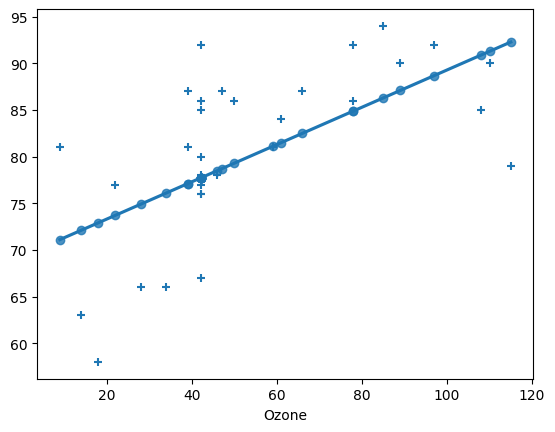

In [99]:
sns.regplot(x=xtest['Ozone'],y=y_pred,scatter_kws=None)
plt.scatter(xtest['Ozone'],ytest,marker='+');